In [1]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

today = pd.datetime.strftime(pd.datetime.today(),'%Y%m%d')

In [2]:
traj = pd.read_csv('Melb-table1.csv', delimiter=',', parse_dates=[3], skipinitialspace=True)
traj_stats = pd.read_csv('Melb-table2.csv', delimiter=',', parse_dates=[3,5], skipinitialspace=True)
traj_stats['Total_Time(HH:MM:SS)'] = traj_stats['Total_Time(HH:MM:SS)'] - pd.to_datetime(today) #convert datetime to time delta
traj_stats['Total_Time(HH:MM:SS)'] = traj_stats['Total_Time(HH:MM:SS)'].astype('timedelta64[m]')
traj_stats.rename(columns={'Total_Time(HH:MM:SS)':'Total_Time(min)'}, inplace=True)

In [3]:
traj_stats.head()

,Trajectory_ID,User_ID,#Photo,Start_Time,Travel_Distance(km),Total_Time(min),Average_Speed(km/h)
0,0,10033564@N03,4,2010-05-03 16:49:44,0,49,0
1,1,10033564@N03,18,2010-05-04 08:33:23,0,631,0
2,2,10033564@N03,17,2010-05-05 10:06:12,0,207,0
3,3,10039304@N05,1,2011-04-09 11:12:16,0,0,0
4,4,10058801@N06,4,2008-05-11 22:34:56,0,9,0


## Number of users, trajectories, and average trajectories per user

In [4]:
num_user = traj_stats['User_ID'].unique().size
num_traj = traj_stats['Trajectory_ID'].unique().size
avg_traj_per_user = num_traj/num_user
print('# users :', num_user)
print('# trajectories :', num_traj)
print('Average trajectories per user :', avg_traj_per_user)

# users : 2458
# trajectories : 19250
Average trajectories per user : 7.831570382424736


## Compute Simple Stats

In [5]:
basic_stats = pd.DataFrame([traj_stats.min(), traj_stats.max(), traj_stats.median(), traj_stats.mean()], \
                           index=['min','max', 'median', 'mean'])
basic_stats.drop('Start_Time', axis=1, inplace=True)
basic_stats.drop('Trajectory_ID', axis=1, inplace=True)
basic_stats.drop('User_ID', axis=1, inplace=True)
basic_stats

,#Photo,Average_Speed(km/h),Total_Time(min),Travel_Distance(km)
min,1.000000,0.000000,0.000000,0.000000
max,1340.000000,332151.344536,1411.000000,366.809744
median,3.000000,0.039019,95.000000,0.074131
mean,8.447169,82.280115,187.466442,13.198710


## Plot histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114923630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1149c4128>]], dtype=object)

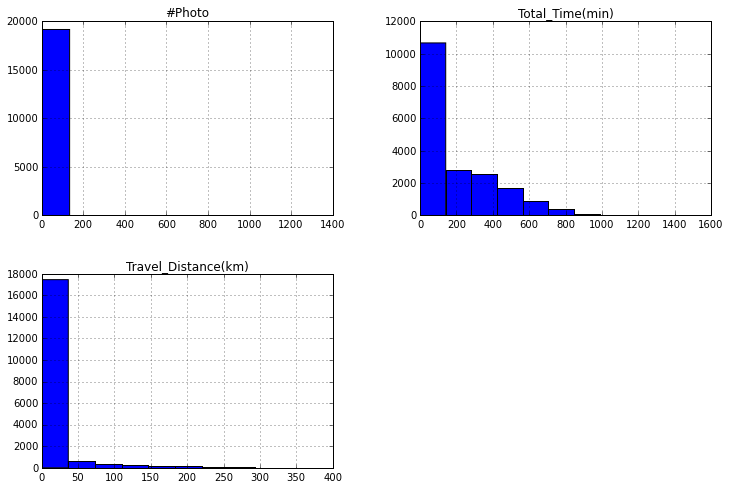

In [6]:
traj_stats.hist(column=['Total_Time(min)', '#Photo', 'Travel_Distance(km)'], figsize=[12,8])

### Let's see the longest trajectory

In [7]:
traj_stats.ix[traj_stats['Travel_Distance(km)'].idxmax()]

Trajectory_ID                         9178
User_ID                       48894056@N00
#Photo                                   4
Start_Time             2009-05-24 09:48:46
Travel_Distance(km)               366.8097
Total_Time(min)                        547
Average_Speed(km/h)               40.16532
Name: 9178, dtype: object

## Draw tranjectories on the map

In [8]:
x_min, x_max = traj.Latitude.min(), traj.Latitude.max()
y_min, y_max = traj.Longitude.min(), traj.Longitude.max()

longest_in_dist_id = traj_stats.ix[traj_stats['Travel_Distance(km)'].idxmax()].Trajectory_ID
longest_in_time_id = traj_stats.ix[traj_stats['Total_Time(min)'].idxmax()].Trajectory_ID

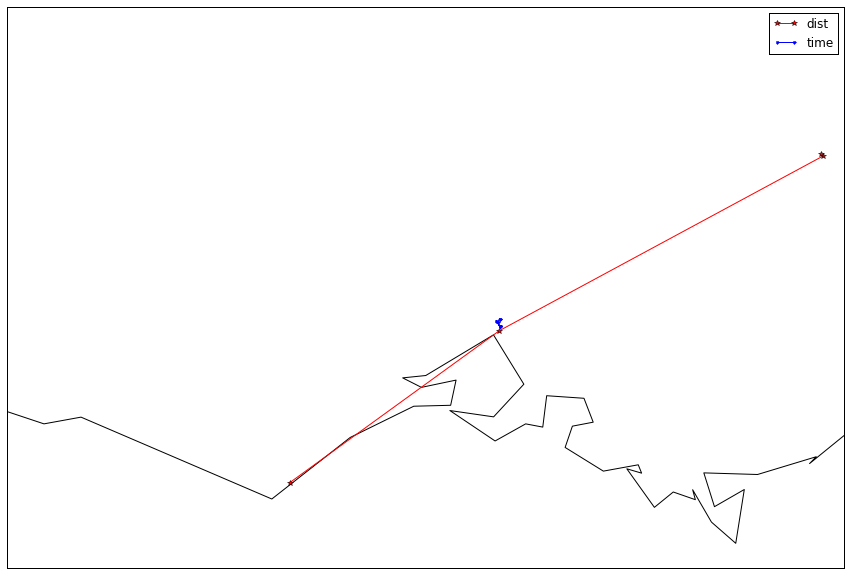

In [9]:
def plot_traj(traj_id, style, label):
    tmp = traj[traj.Trajectory_ID == traj_id]
    plt.plot(tmp.Longitude, tmp.Latitude, style, label = label)

fig = plt.figure(figsize=(15,15))
m = Basemap(projection='cyl', llcrnrlat=x_min, urcrnrlat=x_max,
        llcrnrlon=y_min, urcrnrlon=y_max, resolution='l')
m.drawcoastlines()    

plot_traj(longest_in_dist_id, 'r*-', 'dist')
plot_traj(longest_in_time_id, 'b.-', 'time')

plt.legend()

### The most travelled person

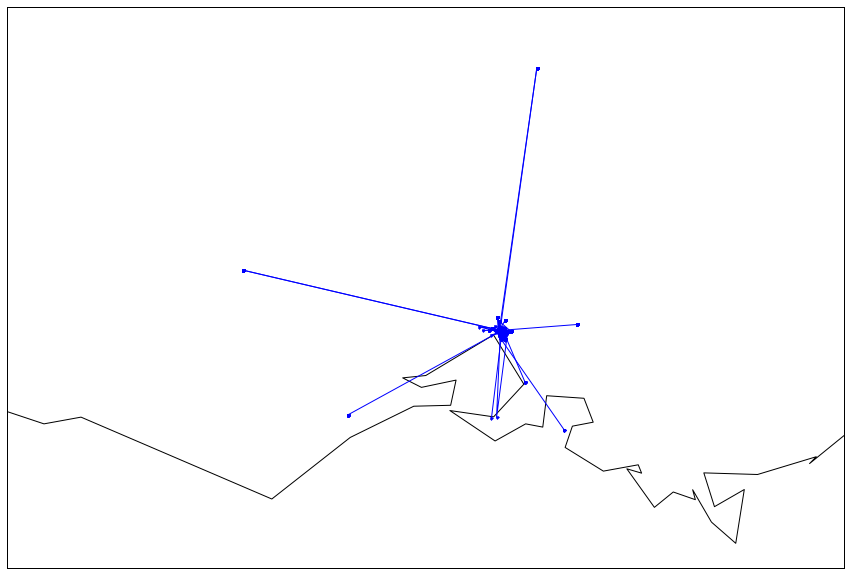

In [10]:
traveler = traj.groupby('User_ID').size().idxmax()
traj_list = traj[traj.User_ID == traveler].Trajectory_ID.unique()

fig = plt.figure(figsize=(15,15))
m = Basemap(projection='cyl', llcrnrlat=x_min, urcrnrlat=x_max,
        llcrnrlon=y_min, urcrnrlon=y_max, resolution='l')
m.drawcoastlines()    

for ti in traj_list:
    plot_traj(ti, 'b.-', str(ti))

# If we remove the trajectories with only one photo
In the following analysis, we only consider the trajectories with at least 2 photos.

In [11]:
traj_stats_new = traj_stats[traj_stats['#Photo']>1]

In [12]:
traj_stats_new.head()

,Trajectory_ID,User_ID,#Photo,Start_Time,Travel_Distance(km),Total_Time(min),Average_Speed(km/h)
0,0,10033564@N03,4,2010-05-03 16:49:44,0,49,0
1,1,10033564@N03,18,2010-05-04 08:33:23,0,631,0
2,2,10033564@N03,17,2010-05-05 10:06:12,0,207,0
4,4,10058801@N06,4,2008-05-11 22:34:56,0,9,0
5,5,10058801@N06,2,2008-09-26 22:02:47,0,0,0


In [13]:
num_user = traj_stats_new['User_ID'].unique().size
num_traj = traj_stats_new['Trajectory_ID'].unique().size
avg_traj_per_user = num_traj/num_user
print('# users :', num_user)
print('# trajectories :', num_traj)
print('Average trajectories per user :', avg_traj_per_user)

# users : 1917
# trajectories : 13767
Average trajectories per user : 7.181533646322379


In [14]:
basic_stats_new = pd.DataFrame([traj_stats_new.min(), traj_stats_new.max(), traj_stats_new.median(), traj_stats_new.mean()], \
                           index=['min','max', 'median', 'mean'])
basic_stats_new.drop('Start_Time', axis=1, inplace=True)
basic_stats_new.drop('Trajectory_ID', axis=1, inplace=True)
basic_stats_new.drop('User_ID', axis=1, inplace=True)
basic_stats_new

,#Photo,Average_Speed(km/h),Total_Time(min),Travel_Distance(km)
min,2.000000,0.000000,0.000000,0.000000
max,1340.000000,332151.344536,1411.000000,366.809744
median,4.000000,0.441300,224.000000,1.259807
mean,11.413162,115.049918,262.128932,18.455377


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1144c15f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116baeda0>]], dtype=object)

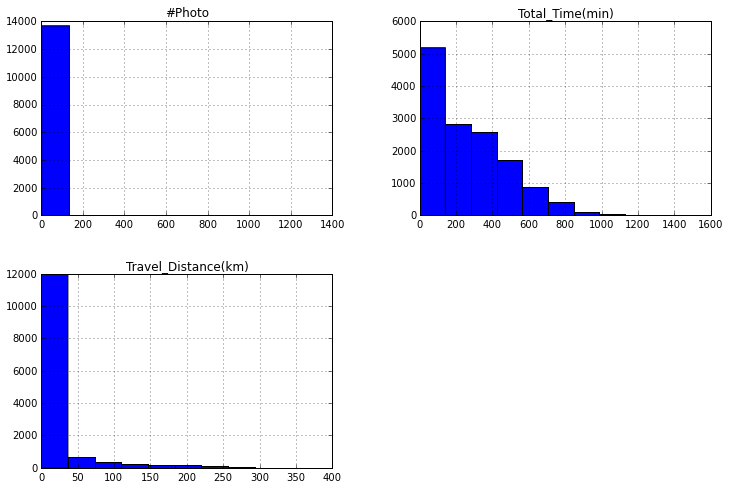

In [15]:
traj_stats_new.hist(column=['Total_Time(min)', '#Photo', 'Travel_Distance(km)'], figsize=[12,8])